
戦闘結果: defeat

===== RPGシミュレーター サマリー =====
実装済みの機能:
- 基本キャラクタークラス
- プレイヤーキャラクターと敵クラス
- 基本的な戦闘システム
- 戦闘ログと分析
- JSONデータの読み込み

次のステップ:
1. スキルシステムの実装
2. 装備品システムの実装
3. より洗練された敵AI
4. 詳細な戦闘分析とバランス調整ツール
- 基本的なスキルシステム

===== アイテムシステムのデモ =====
勇者のステータス:
name: 勇者
level: 1
hp: 100/100
mp: 50/50
strength: 15
defense: 10
magic: 8
speed: 12
is_alive: True
job: 戦士
exp: 0
next_level_exp: 100
exp_to_next: 100

敵のステータス:
name: スライム
level: 1
hp: 50/50
mp: 20/20
strength: 8
defense: 5
magic: 3
speed: 6
is_alive: True
enemy_type: 通常
exp_reward: 15

簡易戦闘テスト:
勇者がスライムに攻撃！
12のダメージを与えた！
スライムのHP: 38/50

スライムが勇者に攻撃！
3のダメージを与えた！
勇者のHP: 97/100
利用可能なアイテム:
- ポーション: HPを50回復する薬
- ハイポーション: HPを150回復する薬
- エーテル: MPを30回復する薬
- ブロンズソード: 銅で作られた剣。攻撃力+5
- 鉄の鎧: 鉄で作られた鎧。防御力+8
- 銀の指輪: 銀製の指輪。魔法攻撃力+3、素早さ+2

勇者のインベントリ:
- ポーション x5
- ブロンズソード x1
- 鉄の鎧 x1

ポーションを使用します...
勇者のHPが50回復した！
勇者のHP: 100/100

装備を装着します...
ブロンズソードを装備した！
鉄の鎧を装備した！
攻撃力変化: 15 -> 20
防御力変化: 10 -> 18

現在の装備:
- weapon: ブロンズソード
- armor: 鉄の鎧
- accessory: なし

===== アイテムシステムのデモ終

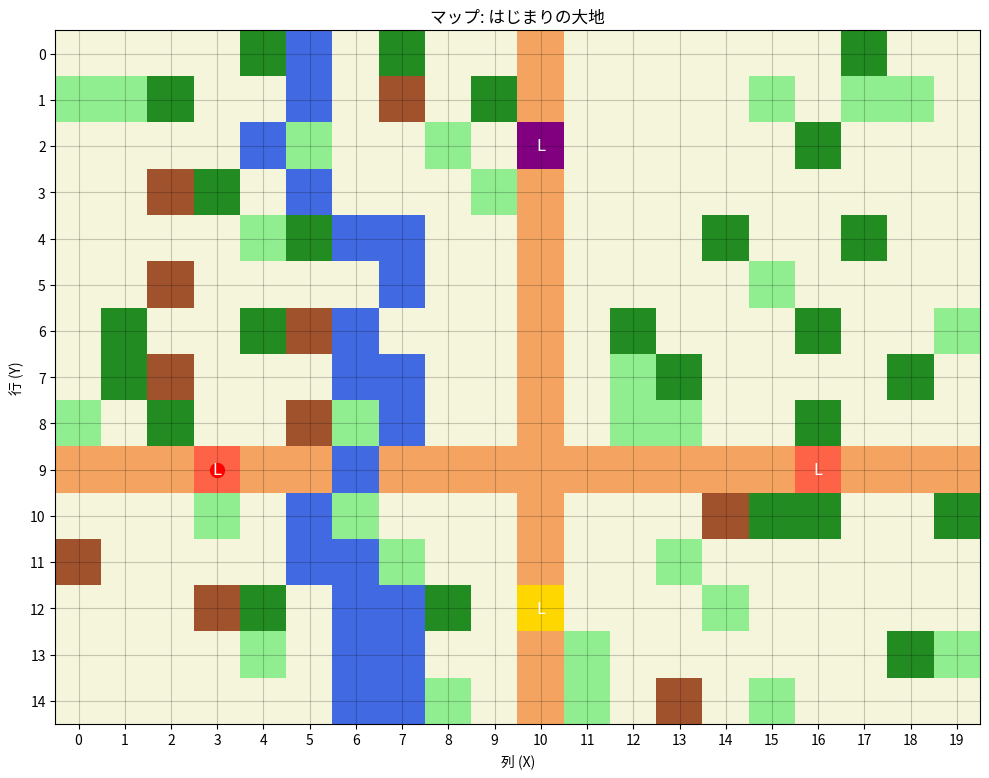


現在位置: (9, 3)
現在のタイル: 町
移動ポイント: 100

東に移動しました。新しい位置: (9, 4)
現在のタイル: 道
移動ポイント: 99.2


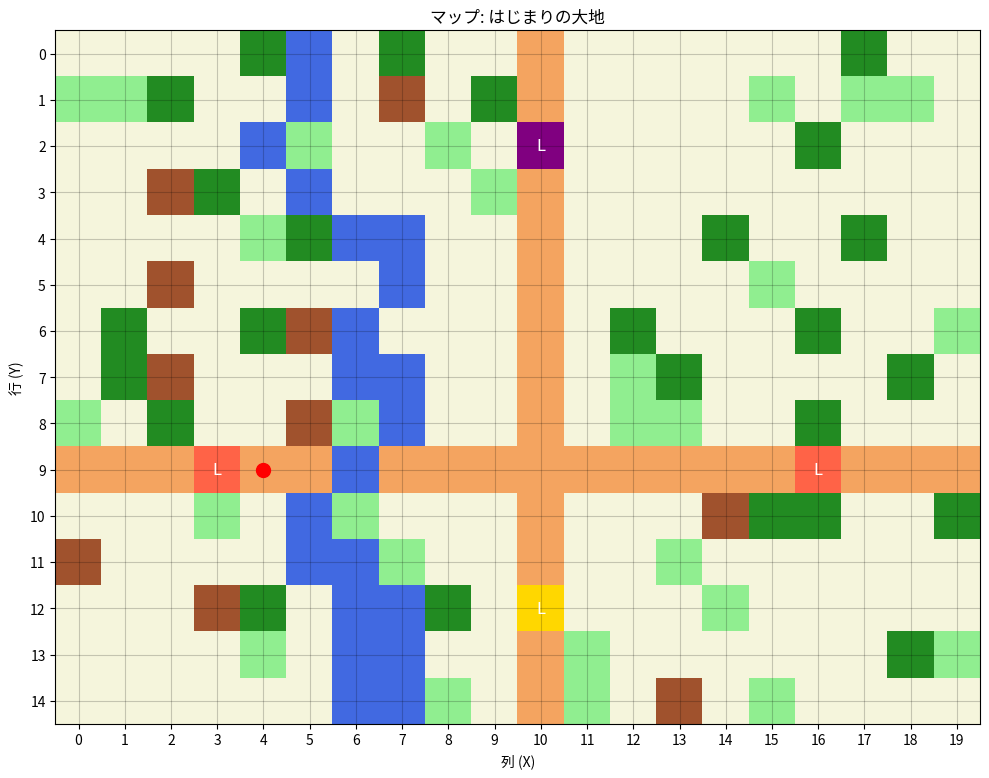


マップを保存: data/sample_map.json
マップを読み込み...
マップ「はじまりの大地」を読み込みました。サイズ: 20x15


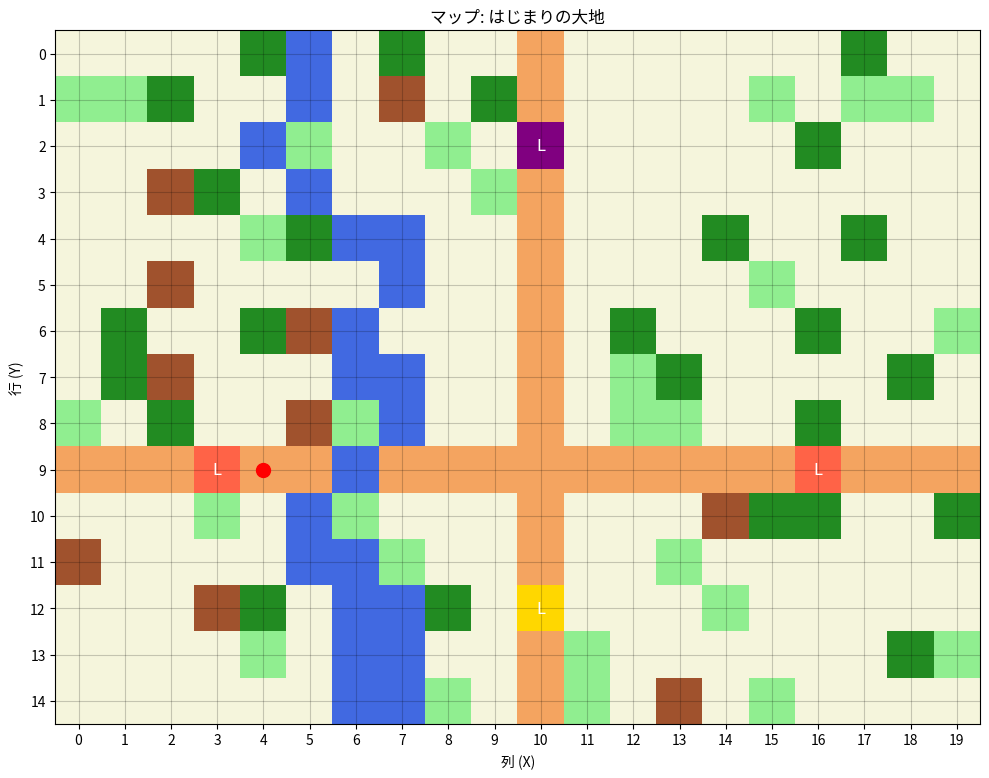


===== マップシステムテスト終了 =====

===== マップシステムのデモ =====


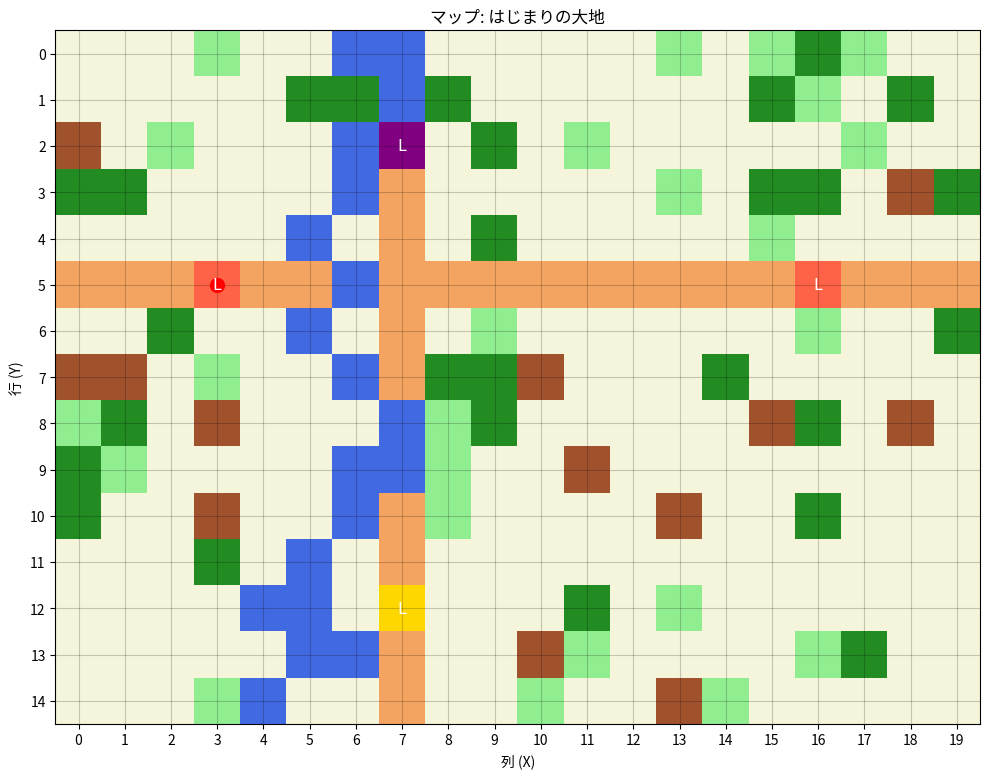


現在位置: (5, 3)
現在のタイル: 町
現在地: 始まりの村 - この地方で最も古い村。多くの冒険者がここから旅立つ。
イベント: 村の雑貨屋 - 日用品や冒険の道具を売っている
イベント: 村の宿屋 - 安価で泊まれる宿。体力が全回復する

マップを保存しました: data/world_map.json

===== マップシステムのデモ終了 =====


In [55]:
# main.ipynb

# RPGシミュレーター - メイン
# 
# このノートブックは、RPGシミュレーターのメインエントリーポイントです。
# 他のノートブックを読み込み、シミュレーションを実行します。

# main.ipynb 先頭部分に追加するコード

# モジュール化に向けた設定
import os
import sys
import json
import random
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# プロジェクトのディレクトリ構造を確保
required_dirs = ['data', 'images', 'notebooks', 'images/characters', 'images/enemies', 'images/backgrounds', 'data/maps']
for dir_path in required_dirs:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        print(f"'{dir_path}'ディレクトリを作成しました。")

# 既存のモジュールを読み込む
%run notebooks/characters.ipynb
%run notebooks/battle_system.ipynb
%run notebooks/skills.ipynb  # 既存のコードを保持

# データディレクトリがなければ作成
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"'{data_dir}'ディレクトリを作成しました。")
else:
    print(f"'{data_dir}'ディレクトリは既に存在します。")

# ## サンプルデータファイルの作成

def create_sample_data_files():
    """サンプルのデータファイルを作成する"""
    
    # キャラクターデータ
    characters_data = [
        {
            "name": "勇者",
            "hp": 100,
            "mp": 50,
            "strength": 15,
            "defense": 10,
            "magic": 8,
            "speed": 12,
            "level": 1,
            "job": "戦士",
            "exp": 0,
            "next_level_exp": 100
        },
        {
            "name": "魔法使い",
            "hp": 70,
            "mp": 100,
            "strength": 6,
            "defense": 6,
            "magic": 18,
            "speed": 10,
            "level": 1,
            "job": "魔法使い",
            "exp": 0,
            "next_level_exp": 100
        },
        {
            "name": "盗賊",
            "hp": 80,
            "mp": 40,
            "strength": 12,
            "defense": 8,
            "magic": 7,
            "speed": 15,
            "level": 1,
            "job": "盗賊",
            "exp": 0,
            "next_level_exp": 100
        }
    ]
    
    # 敵データ
    enemies_data = [
        {
            "name": "スライム",
            "hp": 50,
            "mp": 0,
            "strength": 8,
            "defense": 5,
            "magic": 0,
            "speed": 6,
            "level": 1,
            "exp_reward": 15,
            "enemy_type": "スライム"
        },
        {
            "name": "ゴブリン",
            "hp": 80,
            "mp": 10,
            "strength": 12,
            "defense": 8,
            "magic": 4,
            "speed": 10,
            "level": 2,
            "exp_reward": 25,
            "enemy_type": "通常"
        },
        {
            "name": "オオカミ",
            "hp": 65,
            "mp": 0,
            "strength": 14,
            "defense": 6,
            "magic": 0,
            "speed": 14,
            "level": 2,
            "exp_reward": 30,
            "enemy_type": "獣"
        },
        {
            "name": "ゴーレム",
            "hp": 150,
            "mp": 0,
            "strength": 18,
            "defense": 15,
            "magic": 0,
            "speed": 5,
            "level": 5,
            "exp_reward": 100,
            "enemy_type": "ボス"
        }
    ]
    
    # JSONファイルとして保存
    characters_file = os.path.join(data_dir, 'characters.json')
    enemies_file = os.path.join(data_dir, 'enemies.json')
    
    with open(characters_file, 'w', encoding='utf-8') as f:
        json.dump(characters_data, f, ensure_ascii=False, indent=4)
    
    with open(enemies_file, 'w', encoding='utf-8') as f:
        json.dump(enemies_data, f, ensure_ascii=False, indent=4)
    
    print(f"サンプルデータファイルを作成しました:")
    print(f"- {characters_file}")
    print(f"- {enemies_file}")

# サンプルデータファイルの作成
create_sample_data_files()

# ## データの読み込みと準備

# キャラクターと敵のデータを読み込む
characters = load_characters_from_json(os.path.join(data_dir, 'characters.json'))
enemies = load_enemies_from_json(os.path.join(data_dir, 'enemies.json'))

print("プレイヤーキャラクター:")
for character in characters:
    print(f"- {character.name} (Lv.{character.level} {character.job})")

print("\n敵キャラクター:")
for enemy in enemies:
    print(f"- {enemy.name} (Lv.{enemy.level} {enemy.enemy_type})")

# キャラクターにサンプルスキルを設定
print("\n===== スキルの設定 =====")
skills = create_sample_skills()

for character in characters:
    if character.job == "戦士":
        character.learn_skill("斬りつけ")
        character.learn_skill("全体斬り")
    elif character.job == "魔法使い":
        character.learn_skill("斬りつけ")  # 基本スキルとして持たせる
    elif character.job == "盗賊":
        character.learn_skill("斬りつけ")
        
# キャラクターのスキル一覧を表示
print("\nキャラクターのスキル:")
for character in characters:
    print(f"{character.name} ({character.job}) のスキル:")
    for skill_name in character.skills:
        if skill_name in skills:
            skill = skills[skill_name]
            print(f"  - {skill_name}: {skill.description} (MP: {skill.mp_cost})")

# ## バトルシミュレーション

def run_single_battle():
    """1対1の戦闘をシミュレート - ランダムな敵を使用"""
    
    print("\n===== 1対1の戦闘 =====")
    player = characters[0]  # 勇者（変更なし）
    enemy = random.choice(enemies)  # ランダムな敵を選択
    
    print(f"戦闘: {player.name} vs {enemy.name} (Lv.{enemy.level} {enemy.enemy_type})")
    
    # 新しいインスタンスを作成してバトルに使用
    player_copy = PlayerCharacter(
        name=player.name,
        hp=player.max_hp,
        mp=player.max_mp,
        strength=player.strength,
        defense=player.defense,
        magic=player.magic,
        speed=player.speed,
        level=player.level,
        job=player.job
    )
    
    enemy_copy = Enemy(
        name=enemy.name,
        hp=enemy.max_hp,
        mp=enemy.max_mp,
        strength=enemy.strength,
        defense=enemy.defense,
        magic=enemy.magic,
        speed=enemy.speed,
        level=enemy.level,
        exp_reward=enemy.exp_reward,
        enemy_type=enemy.enemy_type
    )
    
    result, battle_log = simulate_battle([player_copy], [enemy_copy])
    
    print(f"\n戦闘結果: {result}")
    
    return result, battle_log
    
def run_team_battle():
    """チーム戦をシミュレート - ランダムな敵チーム"""
    
    print("\n===== チーム戦 =====")
    player_team = characters[:2]  # 勇者と魔法使い（変更なし）
    
    # 敵チームをランダムに選択（2体）
    enemy_team_size = 2
    enemy_team = random.sample(enemies, enemy_team_size)
    
    player_names = [p.name for p in player_team]
    enemy_names = [e.name for e in enemy_team]
    
    print(f"戦闘: {' & '.join(player_names)} vs {' & '.join(enemy_names)}")
    
    # 各キャラクターの新しいインスタンスを作成
    player_team_copy = []
    for player in player_team:
        new_player = PlayerCharacter(
            name=player.name,
            hp=player.max_hp,
            mp=player.max_mp,
            strength=player.strength,
            defense=player.defense,
            magic=player.magic,
            speed=player.speed,
            level=player.level,
            job=player.job
        )
        player_team_copy.append(new_player)
        
    enemy_team_copy = []
    for enemy in enemy_team:
        new_enemy = Enemy(
            name=enemy.name,
            hp=enemy.max_hp,
            mp=enemy.max_mp,
            strength=enemy.strength,
            defense=enemy.defense,
            magic=enemy.magic,
            speed=enemy.speed,
            level=enemy.level,
            exp_reward=enemy.exp_reward,
            enemy_type=enemy.enemy_type
        )
        enemy_team_copy.append(new_enemy)
    
    result, battle_log = simulate_battle(player_team_copy, enemy_team_copy)
    
    print(f"\n戦闘結果: {result}")
    
    return result, battle_log

def run_boss_battle():
    """ボス戦をシミュレート"""
    
    print("\n===== ボス戦 =====")
    player_team = characters  # 全プレイヤー
    boss = [enemies[3]]       # ゴーレム
    
    player_names = [p.name for p in player_team]
    
    print(f"戦闘: {' & '.join(player_names)} vs {boss[0].name}")
    result, battle_log = simulate_battle(player_team, boss)
    
    print(f"\n戦闘結果: {result}")
    
    return result, battle_log

def run_balance_test(num_simulations=100):
    """バランステスト（複数回のシミュレーション） - ランダムな敵で"""
    
    print(f"\n===== バランステスト ({num_simulations}回) =====")
    player = characters[0]  # 勇者（変更なし）
    
    # 異なる敵に対するパフォーマンスをテストするため、ランダムな敵を選択
    enemy = random.choice(enemies)
    
    print(f"テスト: {player.name} vs {enemy.name} x {num_simulations}回")
    
    # 詳細ログなしで複数回シミュレーション
    stats = simulate_multiple_battles([player], [enemy], num_simulations, show_detailed_log=False)
    
    print(f"\n結果:")
    print(f"勝率: {stats['victory_rate']:.1f}%")
    print(f"平均ターン数: {stats['average_turns']:.1f}")
    print(f"平均戦闘時間: {stats['average_time']:.3f}秒")
    
    return stats
# 2025.3.19視覚モードでシングルバトルをテスト
def run_visual_battle():
    """視覚的表示付きの1対1の戦闘をシミュレート - ランダムな敵"""
    
    print("\n===== 視覚モードの戦闘 =====")
    player = characters[0]  # 勇者（変更なし）
    enemy = random.choice(enemies)  # ランダムな敵を選択
    
    print(f"戦闘: {player.name} vs {enemy.name} (Lv.{enemy.level} {enemy.enemy_type})")
    
    # 新しいインスタンスを作成
    player_copy = PlayerCharacter(
        name=player.name,
        hp=player.max_hp,
        mp=player.max_mp,
        strength=player.strength,
        defense=player.defense,
        magic=player.magic,
        speed=player.speed,
        level=player.level,
        job=player.job
    )
    
    enemy_copy = Enemy(
        name=enemy.name,
        hp=enemy.max_hp,
        mp=enemy.max_mp,
        strength=enemy.strength,
        defense=enemy.defense,
        magic=enemy.magic,
        speed=enemy.speed,
        level=enemy.level,
        exp_reward=enemy.exp_reward,
        enemy_type=enemy.enemy_type
    )
    
    # visual_modeをTrueに設定
    result, battle_log = simulate_battle([player_copy], [enemy_copy], show_detailed_log=False, visual_mode=True)
    
    print(f"\n戦闘結果: {result}")
    
    return result, battle_log

# ## 戦闘分析と可視化

def visualize_battle_stats(stats):
    """戦闘統計を可視化"""
    
    # 日本語フォント設定の修正
    try:
        # まずmatplotlibで利用可能なフォントを確認
        import matplotlib.font_manager as fm
        fonts = [f.name for f in fm.fontManager.ttflist]
        
        # 一般的な日本語フォントのリスト
        japanese_fonts = ['IPAGothic', 'MS Gothic', 'Hiragino Sans', 'Meiryo', 'TakaoGothic', 
                          'Noto Sans CJK JP', 'Yu Gothic', 'sans-serif']
        
        # システムにある日本語フォントを探して設定
        for font in japanese_fonts:
            if font in fonts:
                plt.rcParams['font.family'] = font
                print(f"フォント '{font}' を使用します")
                break
        else:
            # 日本語フォントが見つからない場合はデフォルトフォントを使用
            print("日本語フォントが見つかりませんでした。デフォルトフォントを使用します")
            plt.rcParams['font.family'] = 'sans-serif'
            # ラベルを英語に変更
            labels = ['Victory', 'Defeat', 'Draw']
    except Exception as e:
        print(f"フォント設定エラー: {e}")
        plt.rcParams['font.family'] = 'sans-serif'
        # ラベルを英語に変更
        labels = ['Victory', 'Defeat', 'Draw']
    
    plt.figure(figsize=(12, 6))
    
    # 勝敗グラフ
    plt.subplot(1, 2, 1)
    if 'labels' not in locals():
        labels = ['勝利', '敗北', '引き分け']
    sizes = [stats['victory'], stats['defeat'], stats['draw']]
    colors = ['#66c2a5', '#fc8d62', '#8da0cb']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Battle Results Distribution' if 'Victory' in labels else '戦闘結果の分布')
    
    # ターン数分布
    plt.subplot(1, 2, 2)
    turn_counts = [len([log for log in logs if "ターン" in str(log) and "====" in str(log)]) for logs in stats['logs']]
    plt.hist(turn_counts, bins=range(min(turn_counts) if turn_counts else 0, 
                                    max(turn_counts) + 2 if turn_counts else 10), 
             alpha=0.7, color='#8da0cb')
    plt.xlabel('Turns' if 'Victory' in labels else 'ターン数')
    plt.ylabel('Frequency' if 'Victory' in labels else '頻度')
    plt.title('Battle Turn Distribution' if 'Victory' in labels else '戦闘ターン数の分布')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


# シングルバトルをテスト
single_result, single_log = run_single_battle()

# チーム戦をテスト
team_result, team_log = run_team_battle()

# ボス戦をテスト
boss_result, boss_log = run_boss_battle()

# バランステスト
balance_stats = run_balance_test(100)

# 視覚モードの戦闘テスト
visual_result, visual_log = run_visual_battle()

# 戦闘統計を可視化
#visualize_battle_stats(balance_stats)

# ## まとめと次のステップ

print("\n===== RPGシミュレーター サマリー =====")
print("実装済みの機能:")
print("- 基本キャラクタークラス")
print("- プレイヤーキャラクターと敵クラス")
print("- 基本的な戦闘システム")
print("- 戦闘ログと分析")
print("- JSONデータの読み込み")

print("\n次のステップ:")
print("1. スキルシステムの実装")
print("2. 装備品システムの実装")
print("3. より洗練された敵AI")
print("4. 詳細な戦闘分析とバランス調整ツール")
print("- 基本的なスキルシステム")

# アイテムシステムのテスト
print("\n===== アイテムシステムのデモ =====")
%run ./notebooks/items.ipynb

# アイテム生成
items = create_sample_items()
print("利用可能なアイテム:")
for item_id, item in items.items():
    print(f"- {item.name}: {item.description}")

# プレイヤーにアイテムを追加
player = characters[0]  # 勇者
player.add_item("potion", 5)
player.add_item("bronze_sword", 1)
player.add_item("iron_armor", 1)

print(f"\n{player.name}のインベントリ:")
for item_id, count in player.inventory.items():
    if item_id in items:
        print(f"- {items[item_id].name} x{count}")

# アイテムを使用してみる
print("\nポーションを使用します...")
player.current_hp = 50  # HPを減らしておく
result = player.use_item("potion", items)
print(result["message"])
print(f"{player.name}のHP: {player.current_hp}/{player.max_hp}")

# 装備を装着してみる
print("\n装備を装着します...")
old_strength = player.strength
old_defense = player.defense
result = player.use_item("bronze_sword", items)
print(result["message"])
result = player.use_item("iron_armor", items)
print(result["message"])

print(f"攻撃力変化: {old_strength} -> {player.strength}")
print(f"防御力変化: {old_defense} -> {player.defense}")

# 装備情報の確認
print("\n現在の装備:")
equip_info = player.get_equipment_info(items)
for slot, item_name in equip_info.items():
    print(f"- {slot}: {item_name}")

print("\n===== アイテムシステムのデモ終了 =====")

# マップシステムを読み込む
%run notebooks/map_system.ipynb

# マップシステムのデモ
print("\n===== マップシステムのデモ =====")

# サンプルマップを作成
game_map = create_sample_map()

# キャラクターを取得（勇者を使用）
hero = characters[0]

# 始まりの村の位置を取得
town_pos = [(row, col) for (row, col), loc in game_map.locations.items() 
           if loc.name == "始まりの村"]
if town_pos:
    player_row, player_col = town_pos[0]
else:
    player_row, player_col = 7, 3  # デフォルト位置

# プレイヤーをマップに配置
map_player = MapPlayer(hero, player_row, player_col)

# マップを表示
game_map.display((map_player.row, map_player.col))

# 現在地の情報を表示
print(f"\n現在位置: ({map_player.row}, {map_player.col})")
curr_tile = game_map.get_tile(map_player.row, map_player.col)
print(f"現在のタイル: {TILE_NAMES[curr_tile]}")
location = game_map.get_location(map_player.row, map_player.col)
if location:
    print(f"現在地: {location.name} - {location.description}")
    for event in location.events:
        print(f"イベント: {event['name']} - {event['description']}")

# 簡易移動システム（インタラクティブ）
def interactive_map_movement():
    """簡易的なインタラクティブマップ移動システム"""
    global map_player, game_map
    
    print("\n=== 移動コマンド ===")
    print("w: 上に移動")
    print("d: 右に移動")
    print("s: 下に移動")
    print("a: 左に移動")
    print("r: 休息する（移動ポイント回復）")
    print("q: 終了")
    
    cmd = ""
    while cmd != "q":
        print(f"\n現在位置: ({map_player.row}, {map_player.col}) - 移動ポイント: {map_player.movement_points:.1f}")
        cmd = input("コマンドを入力してください > ")
        
        if cmd == "w":
            direction = DIRECTION_UP
        elif cmd == "d":
            direction = DIRECTION_RIGHT
        elif cmd == "s":
            direction = DIRECTION_DOWN
        elif cmd == "a":
            direction = DIRECTION_LEFT
        elif cmd == "r":
            map_player.rest()
            print("休息して移動ポイントが回復しました。")
            continue
        elif cmd == "q":
            break
        else:
            print("無効なコマンドです。")
            continue
        
        success, location, encounter = map_player.move(direction, game_map)
        if success:
            clear_output(wait=True)
            game_map.display((map_player.row, map_player.col))
            
            # 移動先の情報を表示
            curr_tile = game_map.get_tile(map_player.row, map_player.col)
            print(f"現在のタイル: {TILE_NAMES[curr_tile]}")
            
            if location:
                print(f"到着: {location.name} - {location.description}")
                for event in location.events:
                    print(f"イベント: {event['name']} - {event['description']}")
            
            if encounter:
                # 敵をランダムに選択
                enemy = random.choice(enemies)
                print(f"モンスター出現！ {enemy.name}が現れた！")
                
                # 実際に戦闘するかどうか確認
                battle_cmd = input("戦闘しますか？ (y/n) > ")
                if battle_cmd.lower() == "y":
                    # 戦闘実行
                    result, _ = simulate_battle([hero], [enemy], show_detailed_log=True)
                    if result == "victory":
                        print("戦闘に勝利しました！")
                    else:
                        print("敗北しました...。")
                        # 敗北したらHPを1に設定して回復（ゲームオーバーにはしない）
                        hero.current_hp = 1
                        # 続き
                        print("なんとか逃げ出し、体力をわずかに回復しました")
                        
        else:
            direction_name = ["上", "右", "下", "左"][direction]
            print(f"{direction_name}には移動できません。")
            
    print("マップ移動を終了します。")

# インタラクティブ移動は必要に応じて実行
# interactive_map_movement()

# マップを保存
save_path = os.path.join('data', 'world_map.json')
game_map.save_to_file(save_path)
print(f"\nマップを保存しました: {save_path}")

print("\n===== マップシステムのデモ終了 =====")